## Logistic Regression

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.
The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

<img src="https://d1.awsstatic.com/sigmoid.bfc853980146c5868a496eafea4fb79907675f44.png" alt="logistic" style="width:200px;"/>

Logistic regression is a statistical model that uses the logistic function, or logit function, in mathematics as the equation between x and y. \
The logit function maps y as a sigmoid function of x

<img src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" alt="scurve" style="width:400px;"/>)

### Key Advantages

1. Easier to implement
2. Suitable for linearly separable dataset
3. provides valuable insights




### Types of Logistic Regression

1. Binary Logistic Regression
2. Multinomial Logistic Regression
3. Ordinal Logistic Regression

#### Binary Logistic Regression

Binary logistic regression predicts the relationship between the independent and binary dependent variables.

Examples

1. Decide whether to offer a loan to a customer. Yes/No
2. Evaluate risk of cancer Yes/No
3. Win a soccer match Win/Lose

#### Multinominal Logistic Regression

A categorical variable has more two or more outcomes. 

Examples

1. Most popular transport type
2. Type of food consumed by pets

#### Ordinal Logistic Regression

Dependent variables is an ordinal state. 

Examples

1. Formal Shirt Size
2. Survey Answers
3. Scores on Math Test




In [1]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

In [2]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
X, y = cancer_data['data'], cancer_data['target']

In [4]:
X.shape

(569, 30)

In [5]:
y.shape

(569,)

In [7]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
import pandas as pd

cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df.columns = cancer_df.columns.str.replace(' ','_')

In [13]:
cancer_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
cancer_df['Target'] = cancer_data.target

In [22]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [23]:
cancer_df.isnull().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
Target                     0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X = cancer_df.iloc[:, :10]
y = cancer_df.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

/Users/sharattadimalla/github/machine-learning/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
log_reg.coef_

array([[ 2.42514731, -0.23055951, -0.55820673,  0.00399252, -0.47134009,
        -0.70974824, -1.18959626, -0.747099  , -0.56437296, -0.11722574]])

In [28]:
log_reg.intercept_

array([20.0116264])

## Predict

In [29]:
y_pred = log_reg.predict(X_test)

## Evaluate model performance

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")


Accuracy: 0.9370629370629371
Confusion Matrix: 
[[51  3]
 [ 6 83]]
precision_score: 0.9651162790697675
recall_score: 0.9325842696629213
f1_score: 0.9485714285714286


In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [38]:
auc(fpr, tpr)

np.float64(0.9385143570536828)

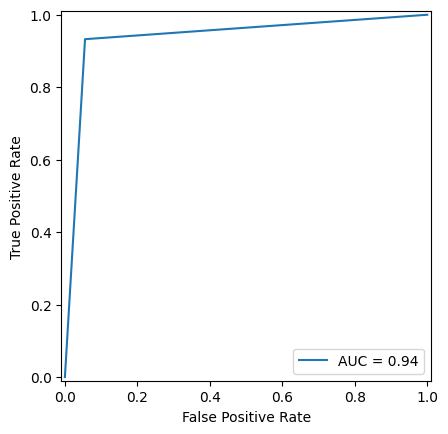

In [39]:
from sklearn.metrics import RocCurveDisplay, auc
# import matplotlib.pyplot as plt

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()